# Benchmark results reporting

## Setup

### Prerequirements
This notebook requires a kernel running Python 3.5+.
You can skip this section if the kernel is already configured.

In [1]:
!pip install -r ./requirements.txt
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable python-markdown/main
#!pip install jupyter_nbextensions_configurator
#!jupyter nbextensions_configurator enable --user

You should consider upgrading via the '/home/a/anaconda3/bin/python -m pip install --upgrade pip' command.


### Imports and selection of the results directory

In [1]:
import report
import report.config as config
from report import create_file, display

## Results

##### Parameters

In [8]:
%run ./reports_config.py

In [9]:
from report.config import *
print(results_files)

['input/mlr3automl_portfolio_newformat.csv', 'input/mlr3automl_eda_changes.csv', 'input/autosklearn_v11.csv', 'input/autosklearn_v2.csv']


#### Loading results, formatting and adding columns
- `result` is the raw result metric computed from predictions at the end the benchmark.
    For classification problems, it is usually `auc` for binomial classification and `logloss` for multinomial classification.
- `score` ensures a standard comparison between tasks: **higher is always better**.
- `norm_score` is a normalization of `score` on a `[0, 1]` scale, with `{{zero_one_refs[0]}}` score as `0` and `{{zero_one_refs[1]}}` score as `1`.
- `imp_result` and `imp_score` for imputed results/scores. Given a task and a framework:
    - if **all folds results/scores are missing**, then no imputation occurs, and the result is `nan` for each fold.
    - if **only some folds results/scores are missing**, then the missing result is imputed by the `{{impute_missing_with}}` result for this fold.

In [10]:
from report import prepare_results

# load result files
res = prepare_results(results_files,
                      renamings=renamed_frameworks,
                      exclusions=excluded_frameworks,
                      imputation=None,
                      normalization=None)
res.results.to_csv(create_file("tables", results_group, "all_results.csv"), 
                   index=False, 
                   float_format=config.ff)


### Tasks list

In [9]:
from report import render_metadata

# tasks = (res.results.groupby(['task', 'type'])['id']
#                     .unique()
#                     .map(lambda id: id[0]))
# display(tasks)

render_metadata(res.metadata, 
                filename=create_file("datasets", results_group, "metadata.csv"))

,task,name,type,dataset,nrows,nfeatures,nclasses,class_imbalance
18,openml.org/t/168868,APSFailure,binary,openml.org/d/41138,76000,171,2,54.272727
17,openml.org/t/34539,Amazon_employee_access,binary,openml.org/d/4135,32769,10,2,16.274117
0,openml.org/t/146818,Australian,binary,openml.org/d/40981,690,15,2,1.247557
21,openml.org/t/146825,Fashion-MNIST,multiclass,openml.org/d/40996,70000,785,10,1.000000
27,openml.org/t/3945,KDDCup09_appetency,binary,openml.org/d/1111,50000,231,2,55.179775
28,openml.org/t/168335,MiniBooNE,binary,openml.org/d/41150,130064,51,2,2.563495
16,openml.org/t/7592,adult,binary,openml.org/d/1590,48842,15,2,3.179173
35,openml.org/t/189354,airlines,binary,openml.org/d/1169,539383,8,2,1.244960
36,openml.org/t/189356,albert,binary,openml.org/d/41147,425240,79,2,1.000000
41,openml.org/t/4823,analcatdata_negotiation,regression,openml.org/d/491,92,6,0,NaN


### Completed tasks/folds

In [12]:
done = (res.done.reset_index()
                .groupby(['task', 'framework'])['fold']
                .unique())
display(done, pretty=False)
# display(tabulate(done, tablefmt='plain'))

                                                     fold
task                                   framework         
adult                                  autosklearn    [0]
                                       mlr3automl_rf  [0]
airlines                               autosklearn    [0]
                                       mlr3automl_rf  [0]
albert                                 autosklearn    [0]
                                       mlr3automl_rf  [0]
amazon_employee_access                 autosklearn    [0]
                                       mlr3automl_rf  [0]
analcatdata_negotiation                mlr3automl_rf  [0]
apsfailure                             autosklearn    [0]
                                       mlr3automl_rf  [0]
australian                             autosklearn    [0]
                                       mlr3automl_rf  [0]
bank-marketing                         autosklearn    [0]
                                       mlr3automl_rf  [0]
blood-transfus

### Missing or crashed/aborted tasks/folds

In [11]:
# not_done = pd.DataFrame([(task, framework) for task in res.tasks 
#                                            for framework in res.frameworks 
#                                            if (task, framework) not in done.index],
#                         columns=['task', 'framework'])
# missing = res.results.append(not_done)\
#                      .groupby(['task', 'framework'])['fold']\
#                      .unique()\
#                      .map(sorted_ints)\
#                      .map(lambda arr: sorted(list(set(range(0, nfolds)) - set(arr))))\
#                      .where(lambda values: values.map(lambda arr: len(arr) > 0))\
#                      .dropna()

missing = (res.missing.reset_index()
                      .groupby(['task', 'framework'])['fold']
                      .unique())
display(missing, pretty=False)

                                    fold
task                    framework       
analcatdata_negotiation autosklearn  [0]
cholesterol             autosklearn  [0]
chscase_census2         autosklearn  [0]
cleveland               autosklearn  [0]
fri_c3_100_25           autosklearn  [0]
kin8nm                  autosklearn  [0]
liver-disorders         autosklearn  [0]
meta                    autosklearn  [0]


### Failing tasks/folds

In [13]:
# failed = res.results.where(np.isnan(all_results.result))\
#                     .groupby(['task', 'framework'])['fold']\
#                     .unique()\
#                     .map(sorted_ints)

failed = (res.failed.reset_index()
                    .groupby(['task', 'framework'])['fold']
                    .unique())
display(failed, pretty=False)

                        fold
task      framework         
albert    mlr3automl_rf  [0]
covertype mlr3automl_rf  [0]
dionis    mlr3automl_rf  [0]
helena    mlr3automl_rf  [0]


### Results anomalies

In [9]:
from report.analysis import list_outliers

display(list_outliers('result', 
                      results=res.results,
#                       results=res.results.loc[res.results.framework=='h2oautoml']
                      z_threshold=2.5,
                     ))

,,fold,0
type,task,framework,


## Data reports

### Results summary

Averaging using arithmetic mean over fold `result` or `score`.
In following summaries, if not mentioned otherwise, the means are computed over imputed results/scores.
Given a task and a framework:
- if **all folds results/scores are missing**, then no imputation occured, and the mean result is `nan`.
- if **only some folds results/scores are missing**, then the amount of imputed results that contributed to the mean are displayed between parenthesis.

In [6]:
from report import render_summary

summary_results = res.results
print(summary_results)

         acc       auc constraint  duration  fold  \
0   0.898551  0.960102        NaN    3624.6     0   
1   0.746667  0.763645        NaN    3633.5     0   
2   1.000000       NaN        NaN    3621.2     0   
3   0.752768  0.846366        NaN    3595.2     0   
4   0.972222       NaN        NaN    3600.4     0   
..       ...       ...        ...       ...   ...   
28       NaN       NaN        NaN       NaN     0   
29       NaN       NaN        NaN       NaN     0   
30       NaN       NaN        NaN       NaN     0   
31       NaN       NaN        NaN       NaN     0   
32       NaN       NaN        NaN       NaN     0   

                                            framework                   id  \
0                                         autosklearn  openml.org/t/146818   
1                                         autosklearn   openml.org/t/10101   
2                                         autosklearn  openml.org/t/146821   
3                                         autosklea

#### Number of models trained

When available, displays the average amount of models trained by the framework for each dataset.

This amount should be interpreted differently for each framework.
For example, with *RandomForest*, this amount corresponds to the number of trees.

In [11]:
render_summary('models', 
               results=summary_results,
               show_imputations = False,
               filename="models_summary.csv", 
               float_format="%.f")

framework                                          autosklearn  \
type       task                                                  
binary     adult                                           8.0   
           airlines                                       10.0   
           albert                                          6.0   
           amazon_employee_access                          9.0   
           apsfailure                                      9.0   
           australian                                     11.0   
           bank-marketing                                 10.0   
           blood-transfusion                               8.0   
           christine                                       9.0   
           credit-g                                       16.0   
           guillermo                                       7.0   
           higgs                                           8.0   
           jasmine                                         9.0   
           kc1                                            21.0   
           kddcup09_appetency                             12.0   
           kr-vs-kp                                       13.0   
           miniboone                                      12.0   
           nomao                                          11.0   
           numerai28.6                                     7.0   
           phoneme                                         7.0   
           riccardo                                        9.0   
           sylvine                                        10.0   
multiclass car                                             1.0   
           cnae-9                                          6.0   
           connect-4                                       3.0   
           covertype                                       2.0   
           dilbert                                         3.0   
           dionis                                          1.0   
           fabert                                         10.0   
           fashion-mnist                                   3.0   
           helena                                          2.0   
           jannis                                          6.0   
           jungle_chess_2pcs_raw_endgame_complete          3.0   
           mfeat-factors                                   5.0   
           robert                                          1.0   
           segment                                         9.0   
           shuttle                                         2.0   
           vehicle                                         5.0   
           volkert                                         3.0   
regression analcatdata_negotiation                         NaN   
           cholesterol                                     NaN   
           chscase_census2                                 NaN   
           cleveland                                       NaN   
           fri_c3_100_25                                   NaN   
           kin8nm                                          NaN   
           liver-disorders                                 NaN   
           meta                                            NaN   

framework                                          mlr3automl_xgboost  
type       task                                                        
binary     adult                                                  NaN  
           airlines                                               NaN  
           albert                                                 NaN  
           amazon_employee_access                                 NaN  
           apsfailure                                             NaN  
           australian                                             NaN  
           bank-marketing                                         NaN  
           blood-transfusion                                      NaN  
           christine                         

#### Results mean

In [7]:
render_summary('acc', 
               results=summary_results)

framework                                          autosklearn  \
type       task                                                  
binary     adult                                      0.872467   
           airlines                                   0.673242   
           albert                                     0.674701   
           amazon_employee_access                     0.908148   
           apsfailure                                 0.994474   
           australian                                 0.898551   
           bank-marketing                             0.910659   
           blood-transfusion                          0.746667   
           christine                                  0.752768   
           credit-g                                   0.770000   
           guillermo                                  0.846500   
           higgs                                      0.722998   
           jasmine                                    0.829431   
           kc1                                        0.862559   
           kddcup09_appetency                         0.982200   
           kr-vs-kp                                   0.996875   
           miniboone                                  0.942646   
           nomao                                      0.974761   
           numerai28.6                                0.504983   
           phoneme                                    0.903882   
           riccardo                                   0.958500   
           sylvine                                    0.951267   
multiclass car                                        1.000000   
           cnae-9                                     0.972222   
           connect-4                                  0.827265   
           covertype                                  0.965578   
           dilbert                                    0.970000   
           dionis                                     0.231769   
           fabert                                     0.708738   
           fashion-mnist                              0.882429   
           helena                                     0.170092   
           jannis                                     0.714354   
           jungle_chess_2pcs_raw_endgame_complete     0.906515   
           mfeat-factors                              0.970000   
           robert                                     0.099000   
           segment                                    0.991342   
           shuttle                                    0.999828   
           vehicle                                    0.835294   
           volkert                                    0.671926   
regression analcatdata_negotiation                         NaN   
           cholesterol                                     NaN   
           chscase_census2                                 NaN   
           cleveland                                       NaN   
           fri_c3_100_25                                   NaN   
           kin8nm                                          NaN   
           liver-disorders                                 NaN   
           meta                                            NaN   

framework                                          mlr3automl_full_preprocessing_1hot_acc  \
type       task                                                                             
binary     adult                                                                 0.856499   
           airlines                                                              0.554552   
           albert                                                                     NaN   
           amazon_employee_access                                                0.942020   
           apsfailure                                                            0.995132   
           australian                                                            0.869565   
           bank-marke

In [14]:
render_summary('imp_result', 
               results=summary_results,
               filename="result_summary.csv")

KeyError: 'Column not found: imp_result'

#### Score mean

In [32]:
render_summary('imp_score', 
               results=summary_results,
               filename="score_summary.csv")

KeyError: 'Column not found: imp_score'

In [33]:
render_summary('norm_score', 
               results=summary_results,
               filename="norm_score_summary.csv")

KeyError: 'Column not found: norm_score'

### Tasks leaderboard

In [8]:
from report import render_leaderboard

leaderboard_results = res.results

In [9]:
render_leaderboard('acc', 
                   results=leaderboard_results,
                   aggregate=True, 
                   show_imputations=True, 
                   filename="tasks_leaderboard.csv")

framework                                         autosklearn  \
type       task                                                 
binary     adult                                            1   
           airlines                                         1   
           albert                                           1   
           amazon_employee_access                           5   
           apsfailure                                       2   
           australian                                       1   
           bank-marketing                                   1   
           blood-transfusion                                2   
           christine                                        2   
           credit-g                                         2   
           guillermo                                        1   
           higgs                                            3   
           jasmine                                          1   
           kc1                                              4   
           kddcup09_appetency                               1   
           kr-vs-kp                                         1   
           miniboone                                        1   
           nomao                                            2   
           numerai28.6                                      4   
           phoneme                                          2   
           riccardo                                         3   
           sylvine                                          1   
multiclass car                                              1   
           cnae-9                                           1   
           connect-4                                        1   
           covertype                                        1   
           dilbert                                          1   
           dionis                                           1   
           fabert                                           2   
           fashion-mnist                                    2   
           helena                                           2   
           jannis                                           2   
           jungle_chess_2pcs_raw_endgame_complete           1   
           mfeat-factors                                    3   
           robert                                           3   
           segment                                          1   
           shuttle                                          1   
           vehicle                                          1   
           volkert                                          3   
regression analcatdata_negotiation                        NaN   
           cholesterol                                    NaN   
           chscase_census2                                NaN   
           cleveland                                      NaN   
           fri_c3_100_25                                  NaN   
           kin8nm                                         NaN   
           liver-disorders                                NaN   
           meta                                           NaN   

framework                                         mlr3automl_full_preprocessing_1hot_acc  \
type       task                                                                            
binary     adult                                                                       5   
           airlines                                                                    2   
           albert                                                                    NaN   
           amazon_employee_access                                                      4   
           apsfailure                                                                  1   
           australian                                                                  2   
           bank-marketing                                                     

### Folds leaderboard

In [17]:
render_leaderboard('score', 
                   results=res.results,
                   filename="folds_leaderboard.csv");

## Visualizations

### Heatmaps

In [11]:
from report import draw_score_heatmap

# heatmap_results = res.results.loc[~res.results.framework.isin(['constantpredictor', 'randomforest'])]
heatmap_results = res.results

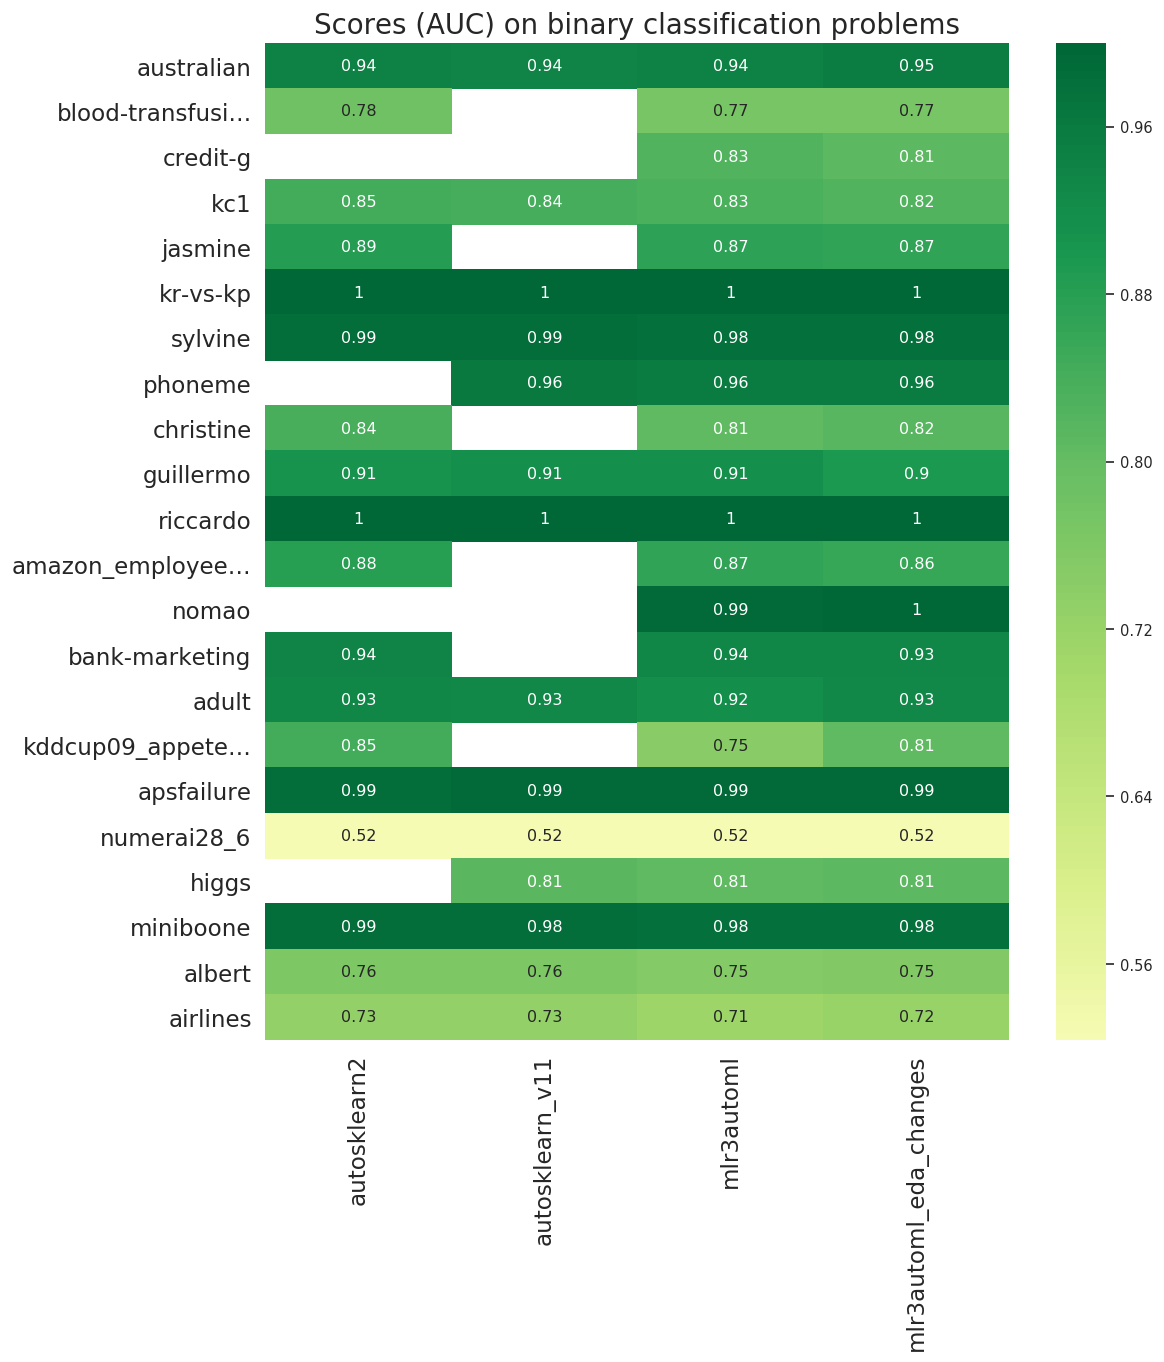

In [12]:
draw_score_heatmap('auc',
                   results=heatmap_results,
                   type_filter='binary', 
                   metadata=res.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores (AUC) on binary classification problems",
                   filename="binary_score_heat.png",
                   center=0.5);

In [ ]:
draw_score_heatmap('logloss', 
                   results=heatmap_results,
                   type_filter='multiclass',
                   metadata=res.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores (ACC) on multi-class classification problems",
                   filename="multiclass_score_heat.png",
                   center=0);

In [ ]:
draw_score_heatmap('r2', 
                   results=heatmap_results,
                   type_filter='regression', 
                   y_sort_by=tasks_sort_by,
                   title=f"Model Fit (R^2) on {results_group} regression problems",
                   filename="regression_r2_heat.png",
                   center=0);

### Linear plots

In [7]:
from report import draw_score_parallel_coord

# parallel_coord_results = res.results.loc[~res.results.framework.isin(['randomforest'])]
parallel_coord_results = res.results

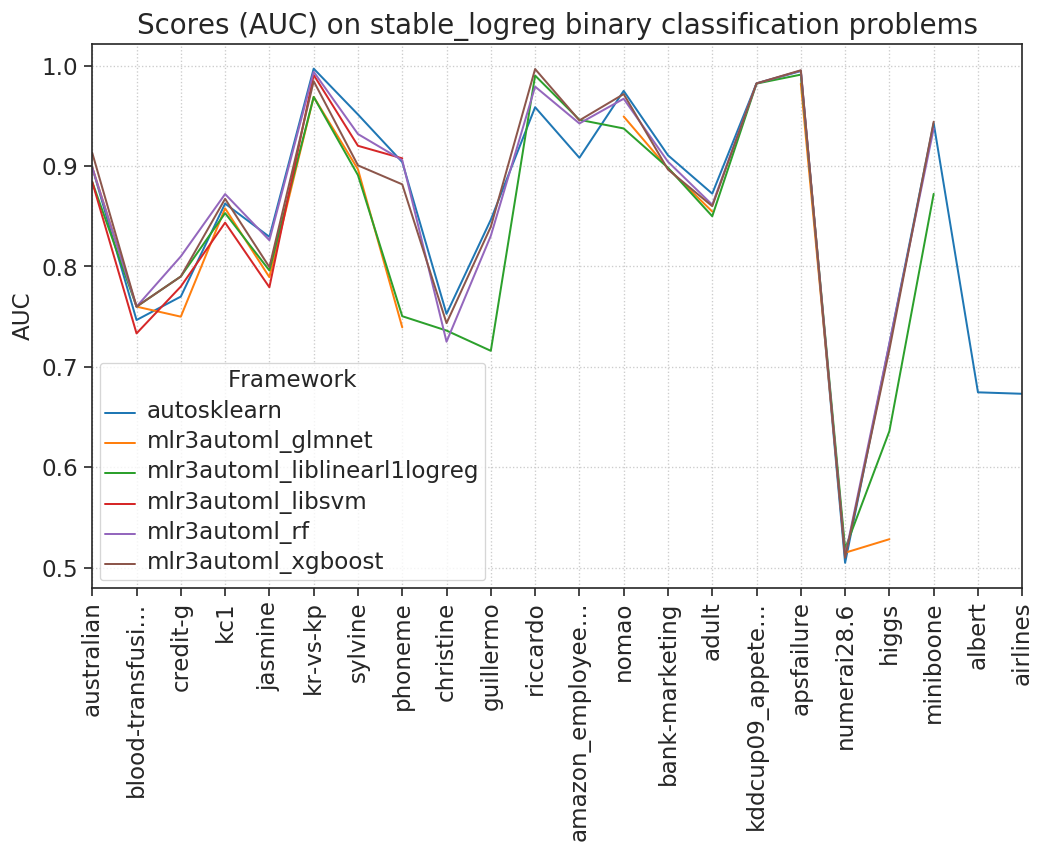

In [8]:
draw_score_parallel_coord('acc',
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                          ylabel=binary_score_label,
                          legend_loc='lower left',
                          filename="binary_score_parallel_ccord.png"
                         );


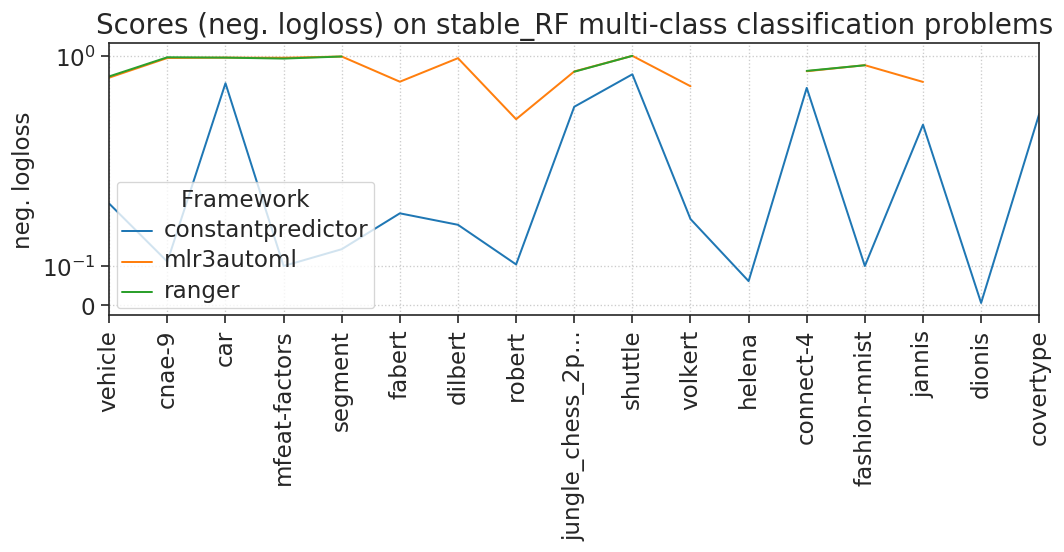

In [54]:
draw_score_parallel_coord('acc',
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                          ylabel=multiclass_score_label,
                          yscale=('symlog', dict(linthreshy=0.5)),
                          legend_loc='lower left',
                          filename="multiclass_score_parallel_ccord.png"
                         );


In [ ]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} binary classification problems",
                          legend_loc='lower left',
                          filename="binary_norm_score_parallel_ccord.png"
                         );


In [ ]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} multi-class classification problems",
                          filename="multiclass_norm_score_parallel_ccord.png", 
                          yscale='symlog',
                         );


### Scatterplots

In [9]:
from report import draw_score_stripplot

# scatterplot_results = (res.results.loc[~res.results.framework.isin(['randomforest'])]
#                                   .sort_values(by=['framework']))  # sorting for colors consistency
scatterplot_results = res.results.sort_values(by=['framework'])  # sorting for colors consistency

ValueError: Invalid RGBA argument: masked

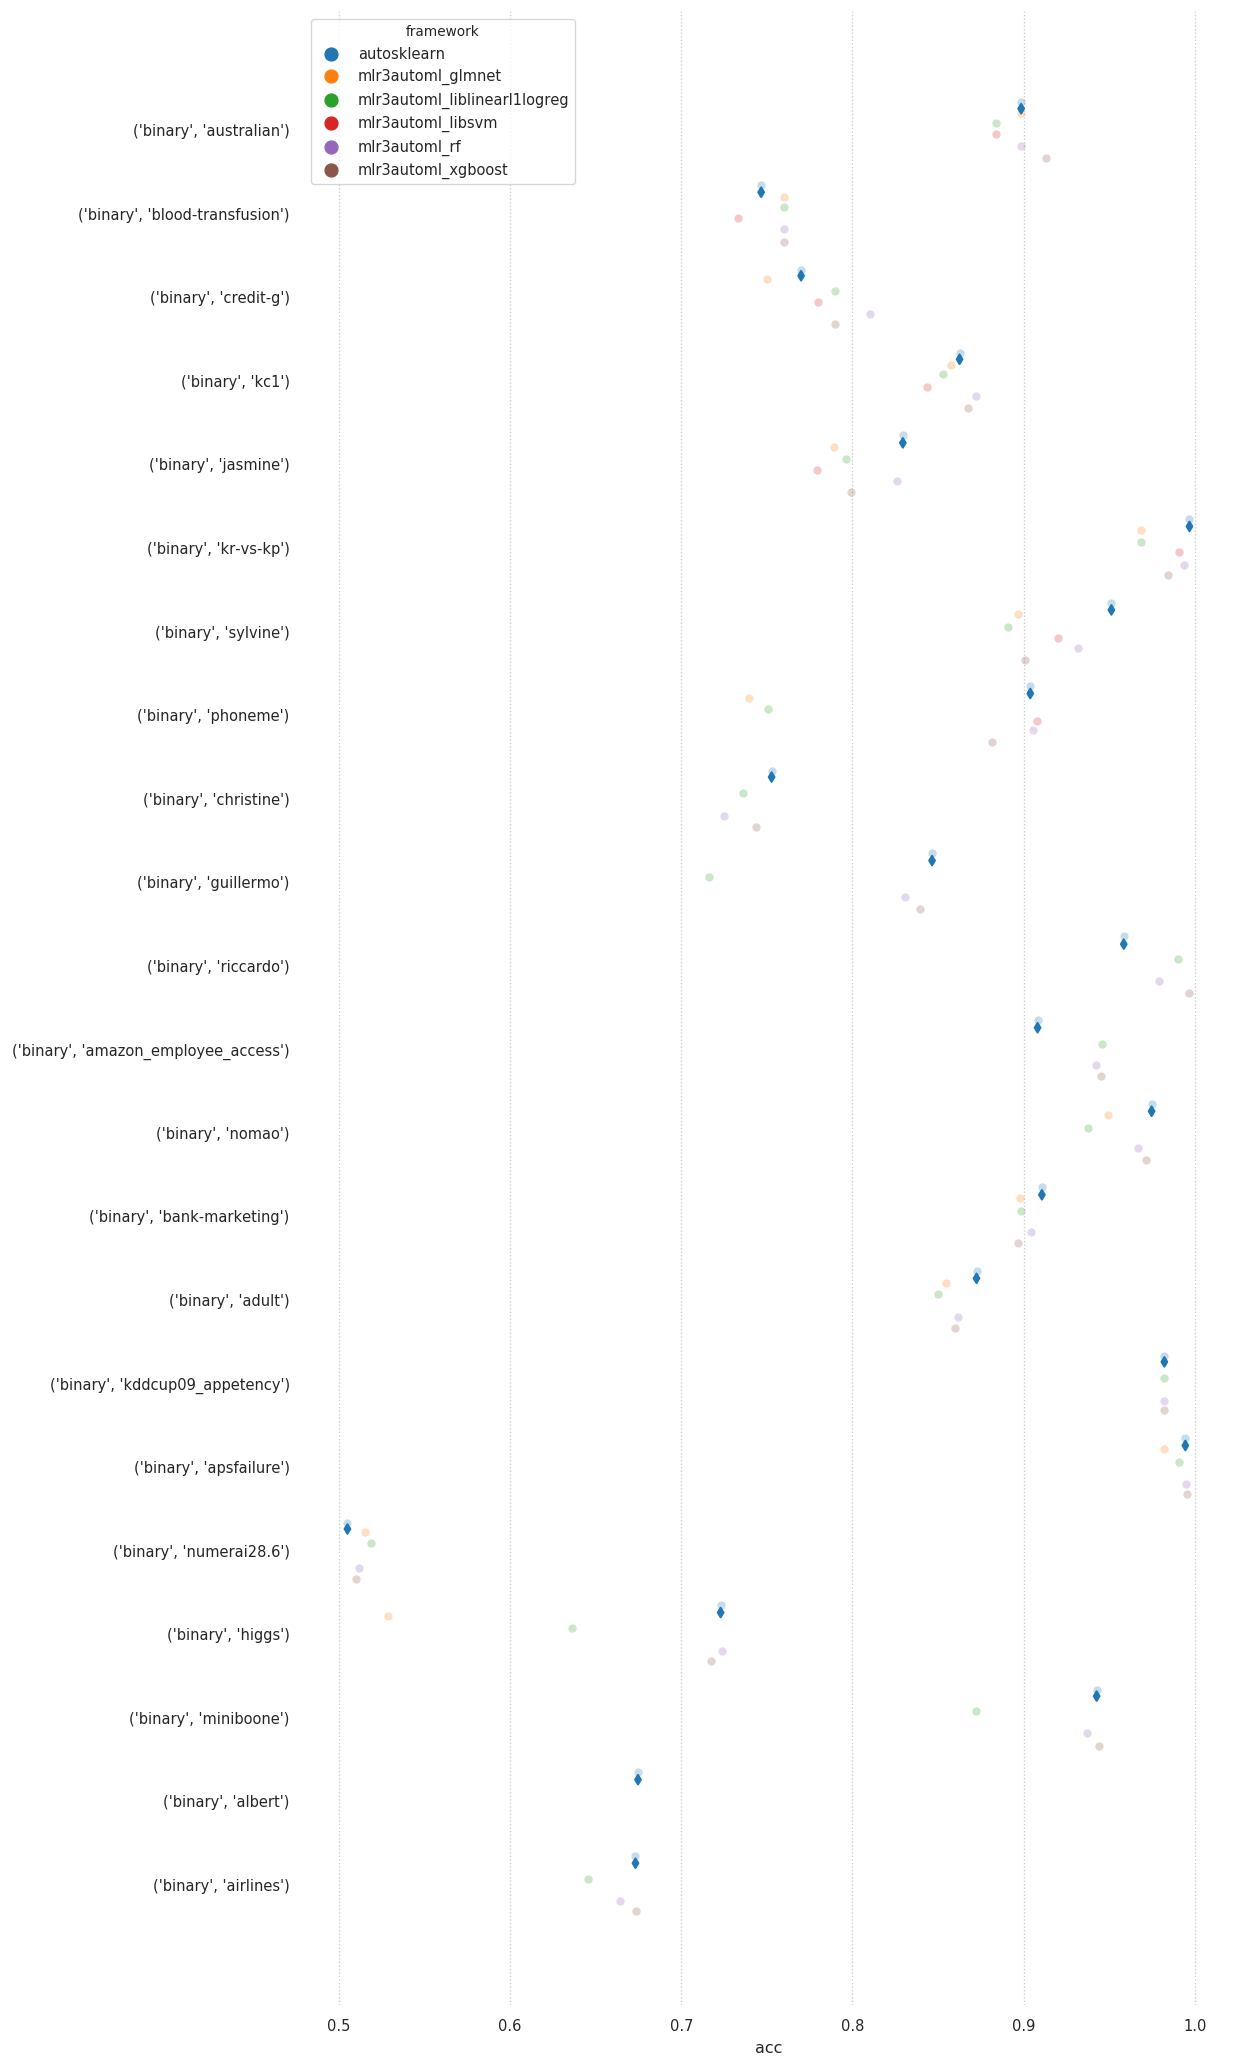

In [10]:
draw_score_stripplot('acc', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                     xlabel=binary_score_label,
                     filename="binary_results_stripplot.png");

ValueError: Invalid RGBA argument: masked

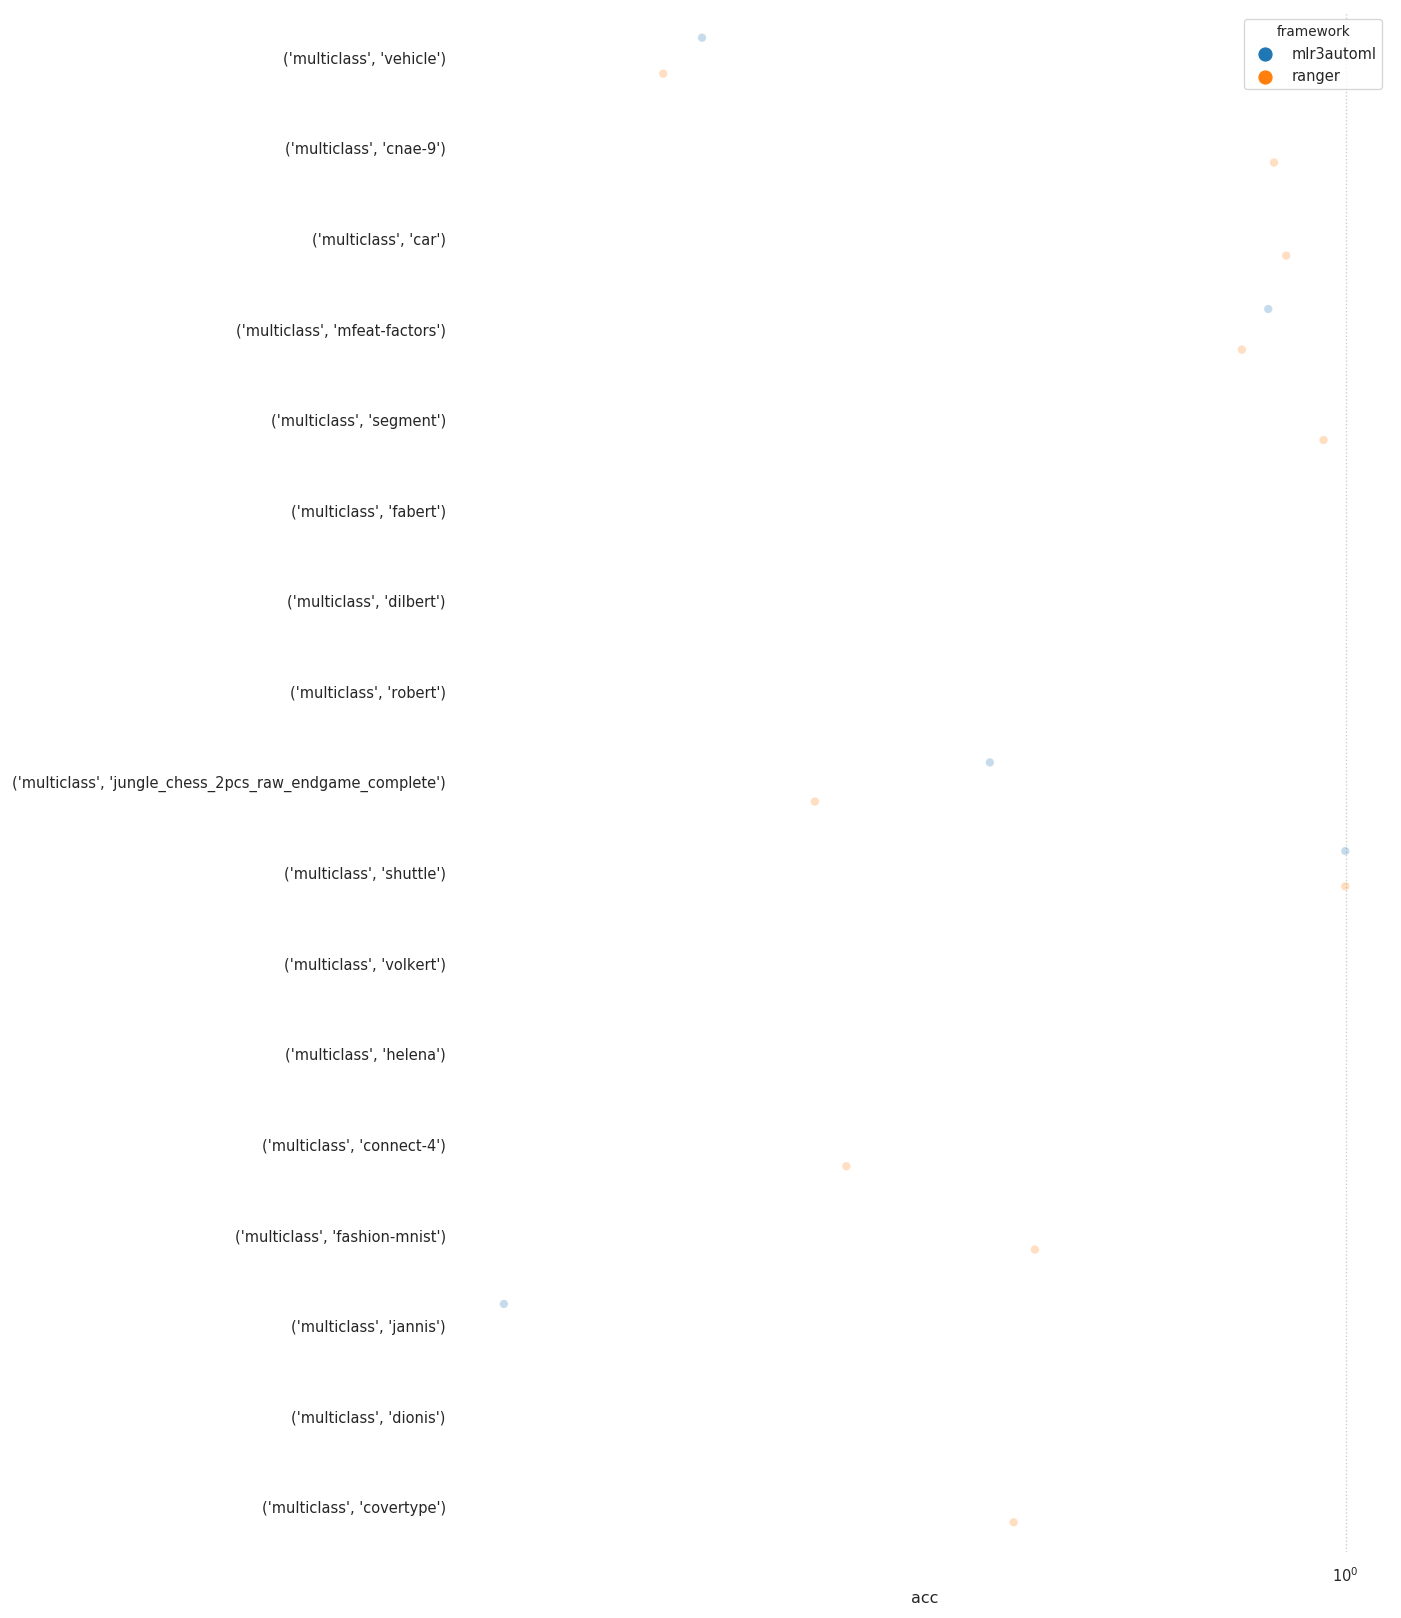

In [71]:
draw_score_stripplot('acc',
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
#                      xbound=(0,10),
                     xscale=('symlog', dict(linthreshx=0.5)),
                     title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                     xlabel=multiclass_score_label, 
                     filename="multiclass_results_stripplot.png");

In [ ]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} binary classification problems",
                     filename="binary_norm_score_stripplot.png");

In [ ]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2.5),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} multi-class classification problems",
                     filename="multiclass_norm_score_stripplot.png");

## Playground

In [15]:
import pandas

pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)


report.util.Namespace

In [24]:
res.metadata

{'australian': {'task': 'openml.org/t/146818', 'dataset': 'openml.org/d/40981', 'type': 'binary', 'name': 'Australian', 'nrows': 690, 'nfeatures': 15, 'nclasses': 2, 'class_imbalance': 1.2475570032573289},
 'blood-transfusion': {'task': 'openml.org/t/10101', 'dataset': 'openml.org/d/1464', 'type': 'binary', 'name': 'blood-transfusion-service-center', 'nrows': 748, 'nfeatures': 5, 'nclasses': 2, 'class_imbalance': 3.202247191011236},
 'car': {'task': 'openml.org/t/146821', 'dataset': 'openml.org/d/40975', 'type': 'multiclass', 'name': 'car', 'nrows': 1728, 'nfeatures': 7, 'nclasses': 4, 'class_imbalance': 18.615384615384617},
 'christine': {'task': 'openml.org/t/168908', 'dataset': 'openml.org/d/41142', 'type': 'binary', 'name': 'christine', 'nrows': 5418, 'nfeatures': 1637, 'nclasses': 2, 'class_imbalance': 1.0},
 'cnae-9': {'task': 'openml.org/t/9981', 'dataset': 'openml.org/d/1468', 'type': 'multiclass', 'name': 'cnae-9', 'nrows': 1080, 'nfeatures': 857, 'nclasses': 9, 'class_imbalan

In [ ]:
tasks_sort_by